In [20]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math

In [3]:
def histogram (matrix):
    matrix = np.matrix(matrix)
    lx,ly = matrix.shape
    histogram = np.zeros(256).astype(int)
    for i in range (256):
        pixels_value_i = np.sum (matrix == i )
        histogram[i] = pixels_value_i
    return histogram

In [4]:
def show_histogram(histogram):
    plt.bar(np.arange(0,256), histogram)
    plt.xlabel('Graylevel / intensity')
    plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

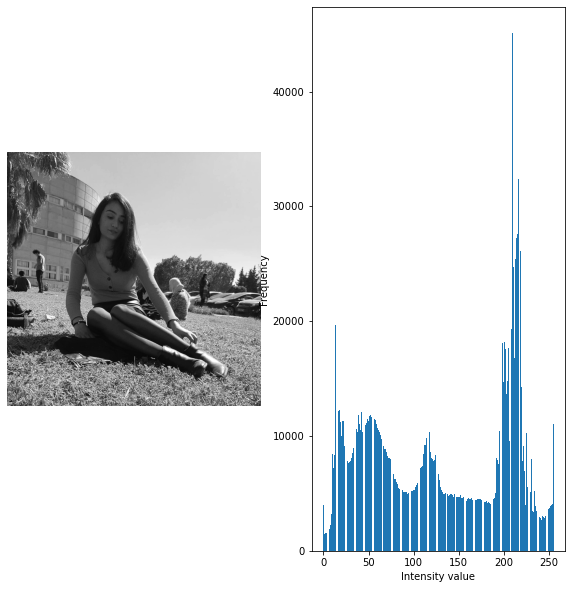

In [163]:
img1 = imageio.imread("images/yasmine.jpg")
img2 = imageio.imread("images/scarlett.jpg")

hist_img1 = histogram(img1)
hist_img2 = histogram(img2)
plt.figure(figsize=(10,10)) 

plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')


plt.subplot(122)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')



In [164]:
def cumulative_histogram (histogram):
    histC = np.zeros(256).astype(int)
    histC[0] = histogram[0]
    for i in range(1,  256):
        histC[i] = histogram[i] + histC[i-1]
    return(histC)

In [165]:
def histogram_equalization(matrix):
    hist = histogram(matrix)
    histC = cumulative_histogram (hist)
    hist_transform = np.zeros(256).astype(np.uint8)
    N, M = matrix.shape
    # create the image to store the equalised version
    matrix_eq = np.zeros([N,M]).astype(np.uint8)
    for z in range(256):
        s = ((255)/float(M*N))*histC[z]
        matrix_eq[ np.where(matrix == z) ] = s
        hist_transform[z] = s
    return (matrix_eq, hist_transform)
        

In [166]:
img1_eq, img1_transf = histogram_equalization(img1)

In [167]:
# compute the new histograms (after equalisation)
histeq_img1 = histogram(img1_eq)

Text(0, 0.5, 'Frequency')

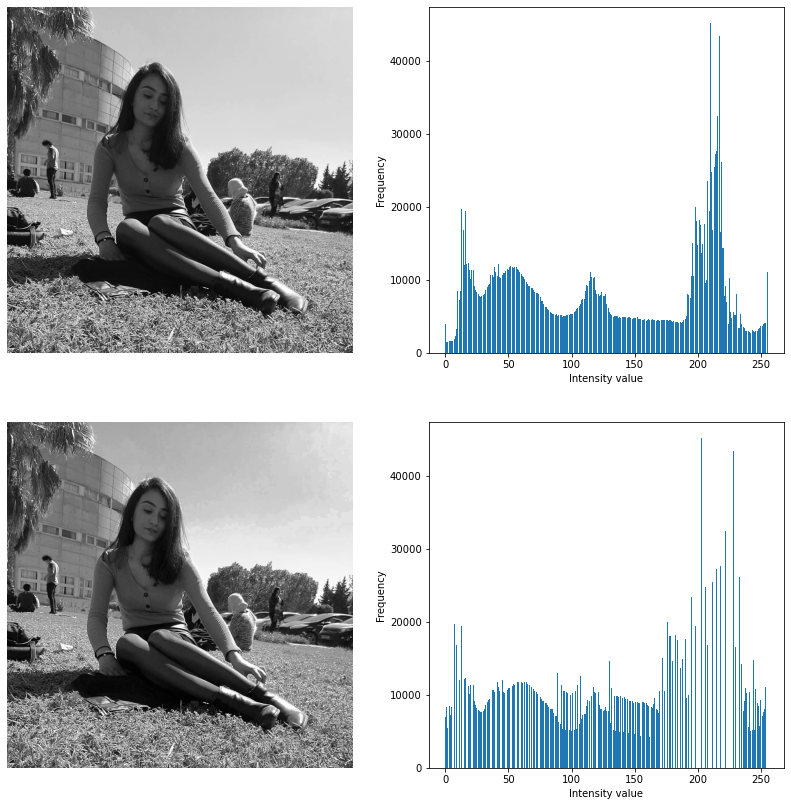

In [168]:
plt.figure(figsize=(14,14)) 
plt.subplot(2,2,1)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2,2,2)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')
# plt.subplot(3,2,4)
# plt.plot(range(256), img1_transf)
# plt.xlabel('input pixel value (r)')
# plt.ylabel('output pixel value (s)')

plt.subplot(2,2,3)
plt.imshow(img1_eq, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2,2,4)
plt.bar(range(256), histeq_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

In [169]:
def thresholding(f, L):
    # create a new image with zeros
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 0 the pixels below the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr    

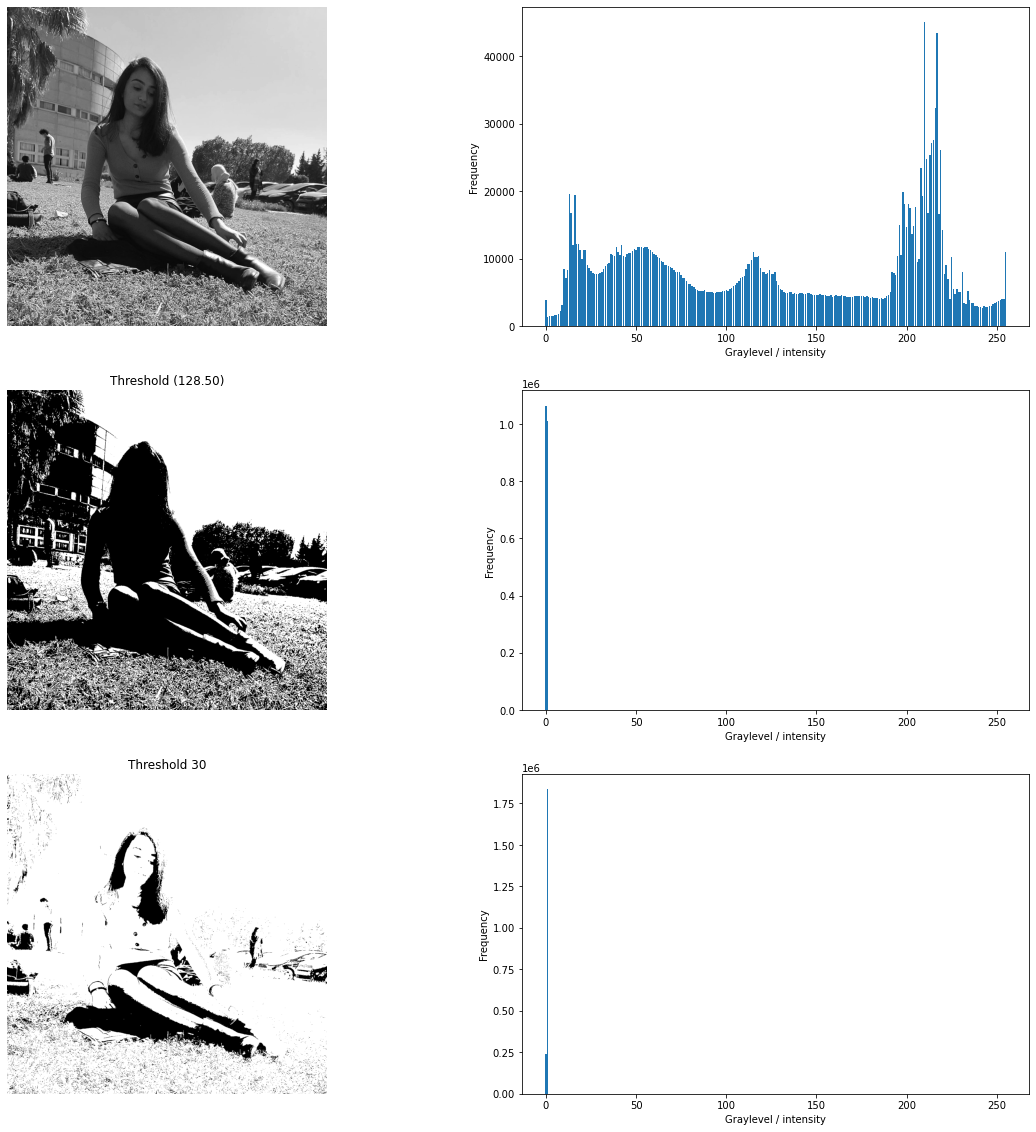

In [175]:
f_thres6 = thresholding(img1,np.mean(img1))
hist_t6 = histogram(f_thres6)
hist = histogram(img1)
f_thres4 = thresholding(img1, 30)
hist_t4 = histogram(f_thres4)
plt.figure(figsize=(20,20))
plt.subplot(321); plt.imshow(img1,cmap="gray"); plt.axis('off')
plt.subplot(322); show_histogram(hist)
plt.subplot(323); plt.imshow(f_thres6,cmap="gray"); plt.axis('off'); plt.title('Threshold (%.2f)' % (np.mean(img1)))
plt.subplot(324); show_histogram(hist_t6)
plt.subplot(325); plt.imshow(f_thres4,cmap="gray"); plt.axis('off'); plt.title('Threshold 30')
plt.subplot(326); show_histogram(hist_t4)

In [176]:
def otsu_threshold(img, max_L):
    
    M = np.product(img.shape)
    min_var = []
    hist_t,_ = np.histogram(img, bins=256, range=(0,256))
    
    img_t = thresholding(img, 0)
    
    for L in np.arange(1, max_L):
        img_ti = thresholding(img, L)
        # computing weights
        w_a = np.sum(hist_t[:L])/float(M)
        w_b = np.sum(hist_t[L:])/float(M)
        # computing variances
        sig_a = np.var(img[np.where(img_ti == 0)])
        sig_b = np.var(img[np.where(img_ti == 1)])
        
        min_var = min_var + [w_a*sig_a + w_b*sig_b]
        
    img_t = thresholding(img, np.argmin(min_var))
    
    return img_t, np.argmin(min_var)

<BarContainer object of 256 artists>

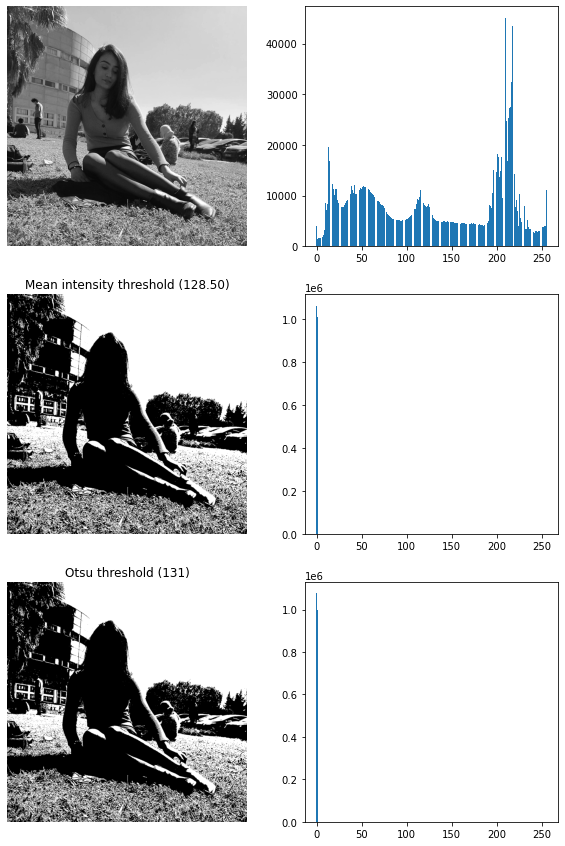

In [177]:
img_t = thresholding(img1,np.mean(img1))
hist_t = histogram(img_t)
img_o, OL = otsu_threshold(img1, 255)
hist_o = histogram(img_o)

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(img1,cmap="gray"); plt.axis('off')
plt.subplot(322); plt.bar(np.arange(0,256), histogram(img1))
plt.subplot(323); plt.imshow(img_t, cmap="gray"); plt.axis('off'); plt.title('Mean intensity threshold (%.2f)' % (np.mean(img1)))
plt.subplot(324); plt.bar(np.arange(0,256), hist_t)
plt.subplot(325); plt.imshow(img_o, cmap="gray"); plt.axis('off'); plt.title('Otsu threshold (%d)' % (OL))
plt.subplot(326); plt.bar(np.arange(0,256), hist_o)

In [178]:
def otsu(matrix):
    lx,ly = np.shape(matrix)
    matrix = np.matrix(matrix)
    histogramme = histogram(matrix)

    min = -math.inf
    minSeuil = -1
    
    for seuil in range(1,len(histogramme)-1):
        w1 = (np.sum(histogramme[:seuil]))
        w2 = (np.sum(histogramme[seuil:]))
        # mub = np.array(histogramme[:seuil]).
        # # for i in range(seuil):
        # #     mub = mub + histogramme[i] * i
        # # mub = mub / np.sum(histogram[:seuil])
        # muf = 0
        # # for i in range(seuil,len(histogramme)):
        # #     muf = muf + histogramme[i] * i
        # # muf = muf / np.sum(histogram[seuil:])
        # variance = wb * wf * (mub-muf) * (mub-muf)
        variance1 = np.var(histogramme[:seuil])
        variance2 = np.var(histogramme[seuil:])
        variance = w1 * variance1 + w2 * variance2
        
        if(variance>min):
            min = variance
            minSeuil = seuil
    print(minSeuil)
            
    return(thresholding(matrix, minSeuil), minSeuil)

In [179]:
otsu_matr, minSeuil = otsu(img)

52


In [180]:
img_thres = thresholding(img1, np.mean(img1))

In [181]:
image_otsu, minSeuil = otsu(img1)

198


<BarContainer object of 256 artists>

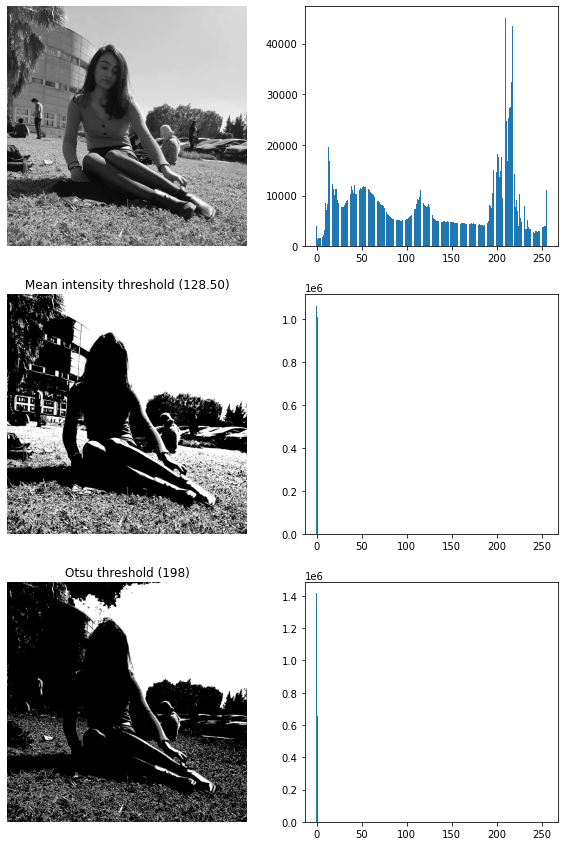

In [182]:
hist = histogram(img1)
hist_t = histogram(img_thres)
hist_o = histogram(image_otsu)

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(img1,cmap="gray"); plt.axis('off')
plt.subplot(322); plt.bar(np.arange(0,256), hist)
plt.subplot(323); plt.imshow(img_thres, cmap="gray"); plt.axis('off'); plt.title('Mean intensity threshold (%.2f)' % (np.mean(img1)))
plt.subplot(324); plt.bar(np.arange(0,256), hist_t)
plt.subplot(325); plt.imshow(image_otsu, cmap="gray"); plt.axis('off'); plt.title('Otsu threshold (%d)' % (minSeuil))
plt.subplot(326); plt.bar(np.arange(0,256), hist_o)

In [183]:
def pad(matrix):
    matrix = np.matrix(matrix)
    matrix_padded = np.pad(matrix, pad_width=1, mode='constant', constant_values=0)
    return matrix_padded

In [184]:
def dilatation(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            arr = np.array([padded_matrix[x-1,y-1],
                   padded_matrix[x,y-1],
                   padded_matrix[x+1,y-1],
                   padded_matrix[x-1,y],
                   padded_matrix[x,y],
                   padded_matrix[x+1,y],
                   padded_matrix[x-1,y+1],
                   padded_matrix[x,y+1],
                   padded_matrix[x+1,y+1]])
            min = arr.min()
            new_padded_matrix[x,y] = min          
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [185]:
def errosion(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            arr = np.array([padded_matrix[x-1,y-1],
                   padded_matrix[x,y-1],
                   padded_matrix[x+1,y-1],
                   padded_matrix[x-1,y],
                   padded_matrix[x,y],
                   padded_matrix[x+1,y],
                   padded_matrix[x-1,y+1],
                   padded_matrix[x,y+1],
                   padded_matrix[x+1,y+1]])
            min = arr.max()
            new_padded_matrix[x,y] = min          
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [186]:
image_err = errosion(image_otsu)

In [187]:
image_dil = dilatation(image_otsu)

<BarContainer object of 256 artists>

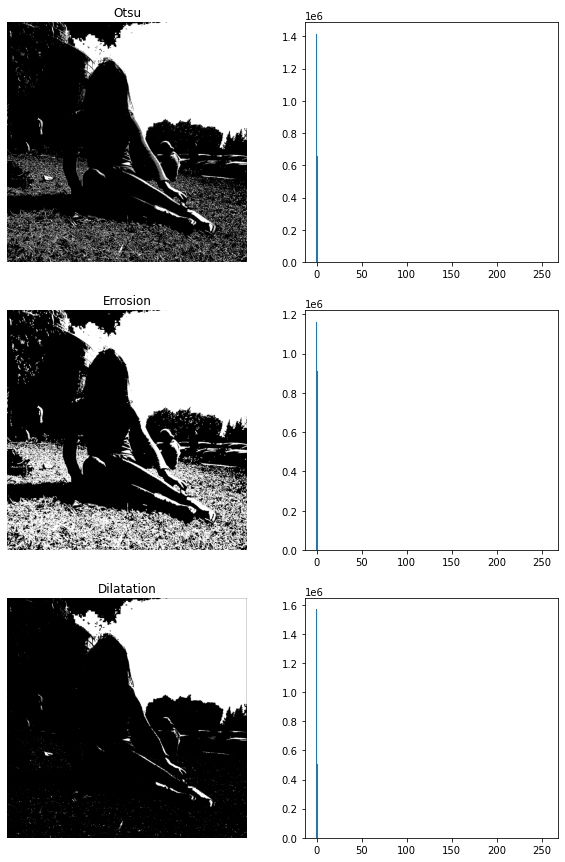

In [188]:
hist = histogram(image_otsu)
hist_err = histogram(image_err)
hist_dil = histogram(image_dil)

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(image_otsu,cmap="gray"); plt.axis('off'); plt.title('Otsu' )
plt.subplot(322); plt.bar(np.arange(0,256), hist)
plt.subplot(323); plt.imshow(image_err, cmap="gray"); plt.axis('off'); plt.title('Errosion' )
plt.subplot(324); plt.bar(np.arange(0,256), hist_err)
plt.subplot(325); plt.imshow(image_dil, cmap="gray"); plt.axis('off'); plt.title('Dilatation' )
plt.subplot(326); plt.bar(np.arange(0,256), hist_dil)

In [193]:
def opening(matrix):
    return erosion(dilatation(matrix))

In [194]:
def closing(matrix):
    return dilatation(erosion(matrix))

In [195]:
img_op = opening(image_otsu)
img_cls = closing(image_otsu)

<BarContainer object of 256 artists>

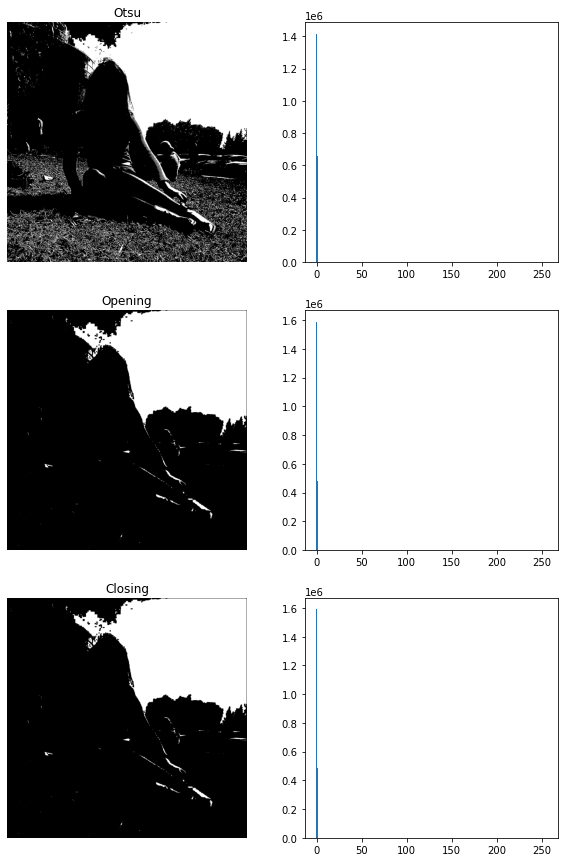

In [196]:
hist_op = histogram(img_op)
hist_cls = histogram(img_cls)

plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(image_otsu,cmap="gray"); plt.axis('off'); plt.title('Otsu' )
plt.subplot(322); plt.bar(np.arange(0,256), hist)
plt.subplot(323); plt.imshow(img_op, cmap="gray"); plt.axis('off'); plt.title('Opening' )
plt.subplot(324); plt.bar(np.arange(0,256), hist_op)
plt.subplot(325); plt.imshow(img_cls, cmap="gray"); plt.axis('off'); plt.title('Closing' )
plt.subplot(326); plt.bar(np.arange(0,256), hist_cls)